# Import all the required libraries

---



In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [ ]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('HDFCBANK.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,2010-01-04 00:00:00+00:00,151.915115,170.570007,172.850006,169.255005,170.000000,3050490
1,2010-01-05 00:00:00+00:00,152.048691,170.720001,172.500000,170.500000,171.000000,8386600
2,2010-01-06 00:00:00+00:00,152.151108,170.835007,172.000000,168.809998,171.399994,6639840
3,2010-01-07 00:00:00+00:00,152.547440,171.279999,176.839996,170.160004,176.839996,6123980
4,2010-01-08 00:00:00+00:00,152.747833,171.505005,172.339996,170.100006,171.199997,7085900


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-4-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,170.570007,172.850006,169.255005,170.000000,3050490
1,170.720001,172.500000,170.500000,171.000000,8386600
2,170.835007,172.000000,168.809998,171.399994,6639840
3,171.279999,176.839996,170.160004,176.839996,6123980
4,171.505005,172.339996,170.100006,171.199997,7085900


Visualizing Closing Price

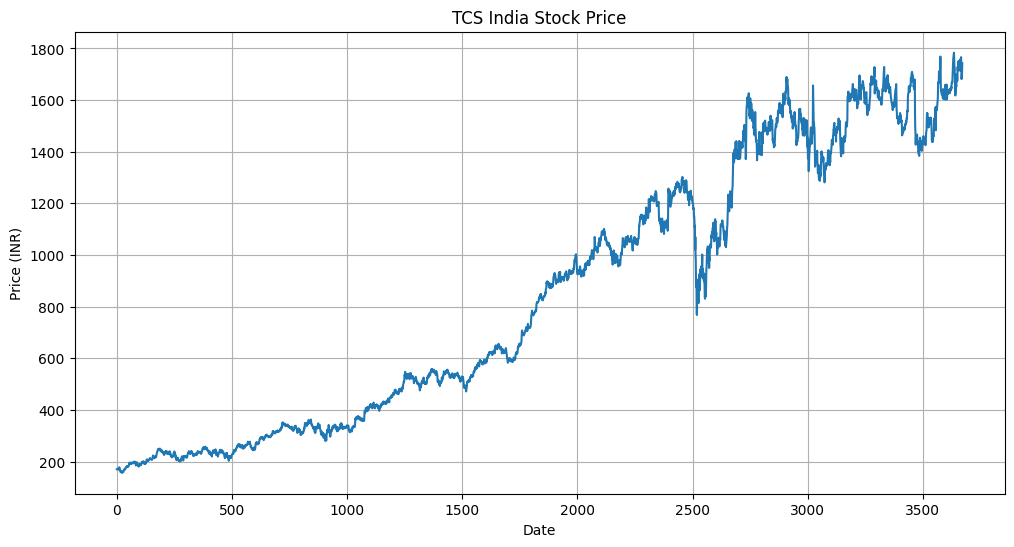

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,170.570007,172.850006,169.255005,170.000000,3050490
1,170.720001,172.500000,170.500000,171.000000,8386600
2,170.835007,172.000000,168.809998,171.399994,6639840
3,171.279999,176.839996,170.160004,176.839996,6123980
4,171.505005,172.339996,170.100006,171.199997,7085900
...,...,...,...,...,...
3667,1718.199951,1775.000000,1708.650024,1772.000000,15697703
3668,1681.349976,1729.400024,1673.000000,1716.750000,17864250
3669,1692.750000,1704.849976,1672.099976,1673.099976,13573235


# Plotting moving averages of 100 day

---



In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,HDFCBANK.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3667,1673.372502
3668,1673.528502
3669,1673.732002
3670,1673.669502


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

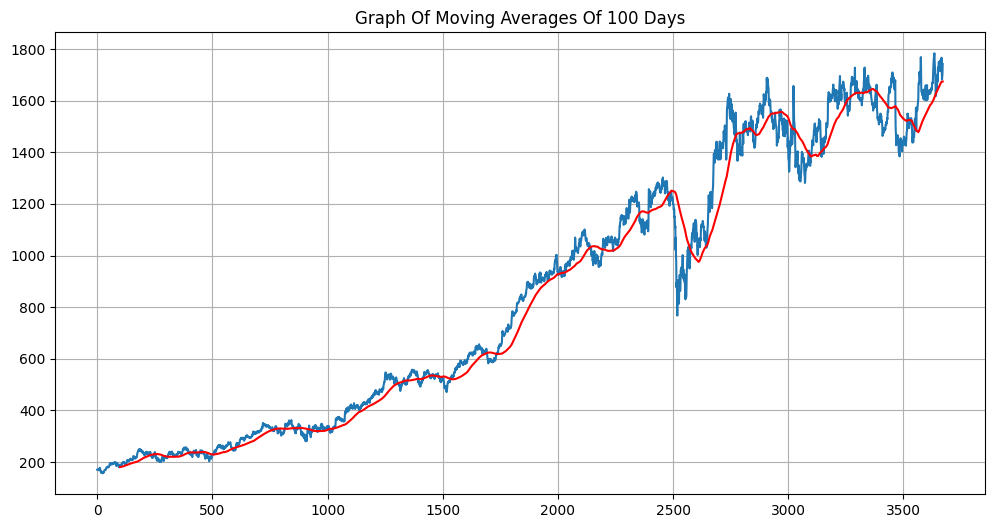

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,HDFCBANK.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3667,1577.128003
3668,1578.181503
3669,1579.508503
3670,1580.754503


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

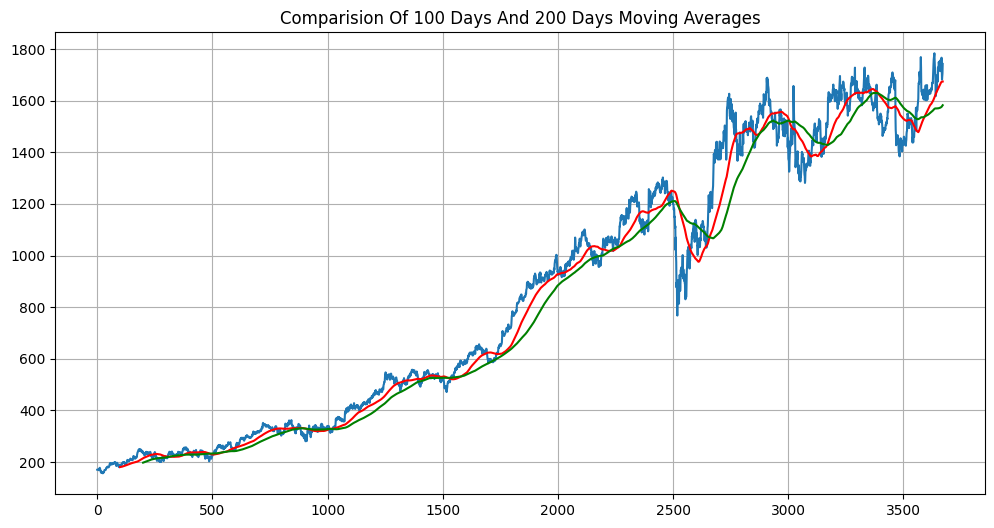

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3672, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2570, 7)
(1102, 7)


In [ ]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,2010-01-04 00:00:00+00:00,151.915115,170.570007,172.850006,169.255005,170.000000,3050490
1,2010-01-05 00:00:00+00:00,152.048691,170.720001,172.500000,170.500000,171.000000,8386600
2,2010-01-06 00:00:00+00:00,152.151108,170.835007,172.000000,168.809998,171.399994,6639840
3,2010-01-07 00:00:00+00:00,152.547440,171.279999,176.839996,170.160004,176.839996,6123980
4,2010-01-08 00:00:00+00:00,152.747833,171.505005,172.339996,170.100006,171.199997,7085900


In [ ]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
2570,2020-06-11 00:00:00+00:00,929.835266,968.599976,988.400024,965.00,985.0,15448857
2571,2020-06-12 00:00:00+00:00,943.418945,982.750000,986.650024,928.00,928.0,21322438
2572,2020-06-15 00:00:00+00:00,911.835632,949.849976,974.000000,943.00,968.0,16004968
2573,2020-06-16 00:00:00+00:00,950.762817,990.400024,993.950012,952.00,975.0,22699985
2574,2020-06-17 00:00:00+00:00,940.059082,979.250000,998.900024,973.25,989.0,18478919


# Using MinMax scaler for normalization of the dataset

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01265986],
       [0.01375783],
       [0.0122674 ],
       ...,
       [0.75094805],
       [0.72726868],
       [0.72607812]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2470, 100, 1)

# ML Model (LSTM)

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 116ms/step - loss: 0.0786 - mean_absolute_error: 0.1958
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0098 - mean_absolute_error: 0.0648
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0078 - mean_absolute_error: 0.0585
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0064 - mean_absolute_error: 0.0524
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0061 - mean_absolute_error: 0.0510
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0069 - mean_absolute_error: 0.0550
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0057 - mean_absolute_error: 0.0504
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0058 - mean_absolute_error: 0.0502
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0046 - mean_absolute_error: 0.0443
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0046 - mean_absolute_error: 0.0442
Epoch 11/100
78/78 ━━━━━━━━

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1102, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,1276.000000
1,1277.500000
2,1274.099976
3,1279.349976
4,1271.900024


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.52195664],
       [0.52341395],
       [0.52011071],
       ...,
       [0.90678124],
       [0.92902939],
       [0.93651016]])

In [ ]:
input_data.shape

(1202, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1102, 100, 1)
(1102,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [ ]:
y_pred.shape

(1102, 1)

In [ ]:
y_test

array([0.21980957, 0.18386281, 0.19843582, ..., 0.90678124, 0.92902939,
       0.93651016])

In [ ]:
y_pred

array([[0.18223828],
       [0.18693784],
       [0.19187333],
       ...,
       [0.89676595],
       [0.8896524 ],
       [0.88022226]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00097153])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

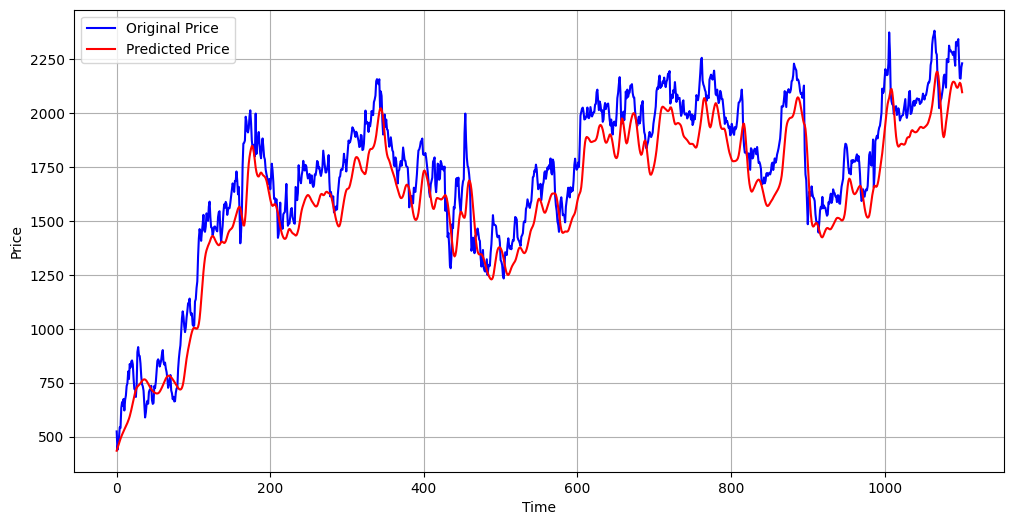

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 7.67%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8404351886156373


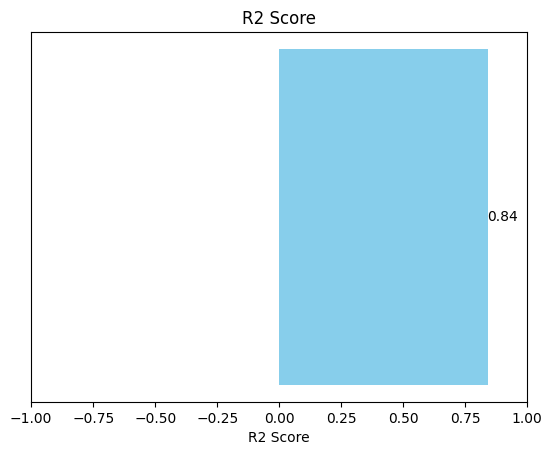

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

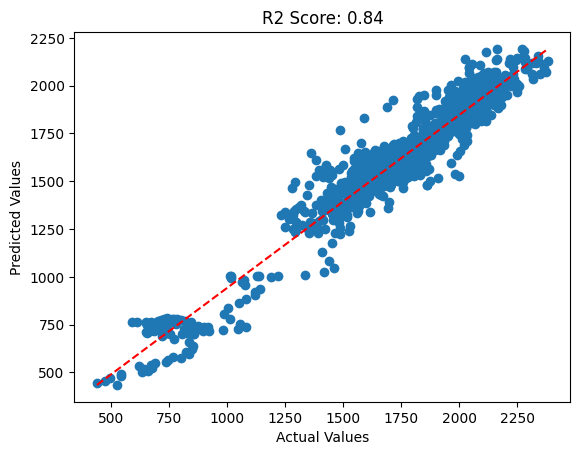

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()